In [95]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot
from sklearn.model_selection import cross_val_score

In [96]:
lr_data = pd.read_csv('hotel_booking.csv')


In [97]:
lr_data.previous_cancellations.unique()

array([ 0,  1,  2,  3, 26, 25, 14,  4, 24, 19,  5, 21,  6, 13, 11],
      dtype=int64)

In [98]:
lr_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [99]:
lr_data=lr_data[~((lr_data.children==0)&(lr_data.adults==0)&(lr_data.babies==0))]

In [100]:
lr_data['agent']=lr_data['agent'].fillna(0)
lr_data['company']=lr_data['company'].fillna(0)

In [101]:
lr_data = lr_data.dropna()

In [102]:
lr_data['agent']=lr_data['agent'].apply(lambda x:'Yes' if x!=0 else 'No')
lr_data['company']=lr_data['company'].apply(lambda x:'Yes' if x!=0 else 'No')

In [103]:
lr_data.meal.unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [104]:
lr_data['meal'] = lr_data['meal'].apply(lambda x: 'SC' if x=='Unedfined' else x)

In [105]:
lr_data = lr_data[~(lr_data['market_segment']=='Undefined')]

In [106]:
lr_data['reserved_assigned']=lr_data.reserved_room_type==lr_data.assigned_room_type

In [107]:
lr_data = lr_data[lr_data.adr>0]

In [108]:
lr_data = lr_data[~(lr_data.distribution_channel=='Undefined')]

In [109]:
lr_data=lr_data.drop(columns=['reservation_status','name', 'email','phone-number', 'credit_card'])

In [110]:

lr_data.country = lr_data.country.apply(lambda x: 'PRT' if x=='PRT' else 'International')

In [111]:
lr_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116927 entries, 2 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           116927 non-null  object 
 1   is_canceled                     116927 non-null  int64  
 2   lead_time                       116927 non-null  int64  
 3   arrival_date_year               116927 non-null  int64  
 4   arrival_date_month              116927 non-null  object 
 5   arrival_date_week_number        116927 non-null  int64  
 6   arrival_date_day_of_month       116927 non-null  int64  
 7   stays_in_weekend_nights         116927 non-null  int64  
 8   stays_in_week_nights            116927 non-null  int64  
 9   adults                          116927 non-null  int64  
 10  children                        116927 non-null  float64
 11  babies                          116927 non-null  int64  
 12  meal            

In [112]:
lr_data['reservation_status_date']=pd.to_datetime(lr_data['reservation_status_date'])

In [113]:
lr_data['reservation date'] = pd.DatetimeIndex(lr_data['reservation_status_date']).date
lr_data['reservation month'] = pd.DatetimeIndex(lr_data['reservation_status_date']).month
lr_data['reservation year'] = pd.DatetimeIndex(lr_data['reservation_status_date']).year

In [114]:
lr_data=lr_data.drop(columns=['reservation_status_date'])

In [115]:
lr_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116927 entries, 2 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           116927 non-null  object 
 1   is_canceled                     116927 non-null  int64  
 2   lead_time                       116927 non-null  int64  
 3   arrival_date_year               116927 non-null  int64  
 4   arrival_date_month              116927 non-null  object 
 5   arrival_date_week_number        116927 non-null  int64  
 6   arrival_date_day_of_month       116927 non-null  int64  
 7   stays_in_weekend_nights         116927 non-null  int64  
 8   stays_in_week_nights            116927 non-null  int64  
 9   adults                          116927 non-null  int64  
 10  children                        116927 non-null  float64
 11  babies                          116927 non-null  int64  
 12  meal            

In [116]:
cat_cols=lr_data.select_dtypes(object).columns

In [117]:
cat_cols

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'agent', 'company', 'customer_type',
       'reservation date'],
      dtype='object')

In [118]:
from sklearn.preprocessing import LabelEncoder

In [119]:
cat_cols

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'agent', 'company', 'customer_type',
       'reservation date'],
      dtype='object')

In [120]:
for i in cat_cols:
    le = LabelEncoder()
    lr_data[i]=le.fit_transform(lr_data[i])

In [121]:
lr_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116927 entries, 2 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           116927 non-null  int32  
 1   is_canceled                     116927 non-null  int64  
 2   lead_time                       116927 non-null  int64  
 3   arrival_date_year               116927 non-null  int64  
 4   arrival_date_month              116927 non-null  int32  
 5   arrival_date_week_number        116927 non-null  int64  
 6   arrival_date_day_of_month       116927 non-null  int64  
 7   stays_in_weekend_nights         116927 non-null  int64  
 8   stays_in_week_nights            116927 non-null  int64  
 9   adults                          116927 non-null  int64  
 10  children                        116927 non-null  float64
 11  babies                          116927 non-null  int64  
 12  meal            

In [122]:
### True False to 0 and 1
lr_data['reserved_assigned']=lr_data['reserved_assigned'].apply(lambda x: 1 if x==True else 0 )

In [123]:
y = lr_data.is_canceled
X = lr_data.drop(columns=['is_canceled','reservation year','arrival_date_year'])

In [124]:
from sklearn.preprocessing import StandardScaler

In [125]:
X_std = StandardScaler().fit_transform(X)

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

### AUTOMATED CODES FOR MODEL AND PERFORMANCE

In [127]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [158]:
model_dict={'logreg':LogisticRegression(),
            'Decision tree':DecisionTreeClassifier(),
            'Random Forest':RandomForestClassifier(random_state=42),
            'Ada Boost':AdaBoostClassifier(),
           'KNN': KNeighborsClassifier(),
           'Boosted RF' :AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=42)),
           'XGBoost Classifier':XGBClassifier(random_state=20)}

In [159]:

model_f1_score=[]
model_accuracy_score=[]
model_f1_score_variance=[]
model_accuracy_score_variance=[]
for i in model_dict.values():
    f1 = cross_val_score(estimator=i,X=X_std,y=y,scoring='f1_weighted',cv=kf)
    acc = cross_val_score(estimator=i,X=X_std,y=y,scoring='accuracy',cv=kf)
    model_f1_score.append(np.mean(f1))
    model_accuracy_score.append(np.mean(acc))
    model_f1_score_variance.append(np.std(f1))
    model_accuracy_score_variance.append(np.std(acc))


C:\Users\Lokavishruth\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Lokavishruth\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted

In [160]:
model_stats=pd.DataFrame()
model_stats['Model Name']=model_dict.keys()
model_stats['Model F1 score'] = model_f1_score
model_stats['Model Accuracy score'] = model_accuracy_score
model_stats['Model F1 score variance error'] = model_f1_score_variance
model_stats['Model Accuracy score variance error'] = model_accuracy_score_variance


In [161]:
model_stats

,Model Name,Model F1 score,Model Accuracy score,Model F1 score variance error,Model Accuracy score variance error
0,logreg,0.807336,0.813080,0.002957,0.002714
1,Decision tree,0.943228,0.942708,0.001169,0.001105
2,Random Forest,0.955891,0.956255,0.001002,0.000975
3,Ada Boost,0.838918,0.841730,0.001791,0.001651
4,KNN,0.875292,0.876342,0.001335,0.001293
5,Boosted RF,0.957690,0.956443,0.001858,0.001572
6,XGBoost Classifier,0.975270,0.975429,0.001611,0.001586


In [162]:
import matplotlib.pyplot as plt

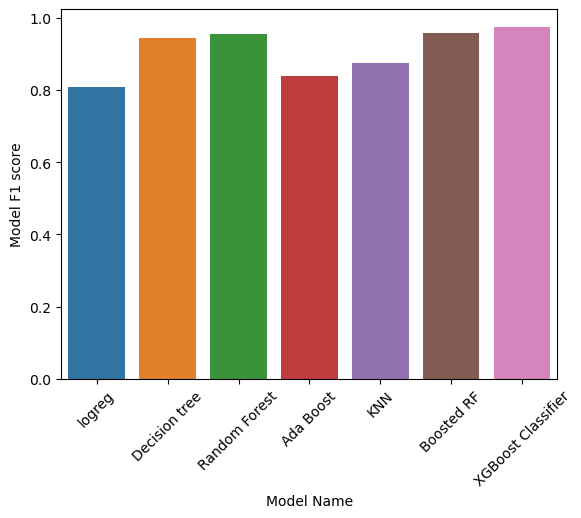

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'logreg'),
  Text(1, 0, 'Decision tree'),
  Text(2, 0, 'Random Forest'),
  Text(3, 0, 'Ada Boost'),
  Text(4, 0, 'KNN'),
  Text(5, 0, 'Boosted RF'),
  Text(6, 0, 'XGBoost Classifier')])

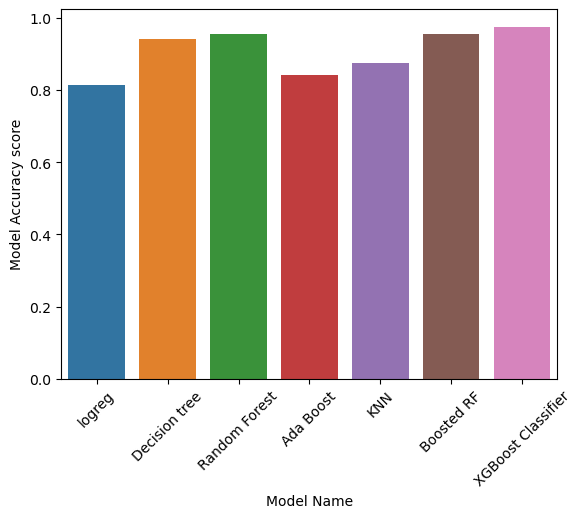

In [163]:
sns.barplot(y=model_stats['Model F1 score'],x=model_stats['Model Name'])
plt.xticks(rotation=45)
plt.show()
sns.barplot(y=model_stats['Model Accuracy score'],x=model_stats['Model Name'])
plt.xticks(rotation=45)

### AUTOMATED CODE END

### Hyper parameter tuning

#### Random Forest tuning

In [164]:
from sklearn.model_selection import RandomizedSearchCV

In [165]:
np.arange(2,40,4)

array([ 2,  6, 10, 14, 18, 22, 26, 30, 34, 38])

In [166]:
params = {"n_estimators":[100,110,120,130],
    "criterion":['gini','entropy'],
    "max_depth":np.arange(10,40,4),
    "min_samples_split":np.arange(1,10,2),
    "min_samples_leaf":np.arange(1,10,2),
   "max_features":['auto','sqrt','log2']
         }

In [167]:
rscv_rf = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
    param_distributions=params,
    scoring='accuracy',
    n_jobs=-1,
    cv=kf)

In [168]:
rscv_rf.fit(X,y)

C:\Users\Lokavishruth\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lokavishruth\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lokavishruth\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\Lokavishruth\Anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Lokavish

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([10, 14, 18, 22, 26, 30, 34, 38]),
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([1, 3, 5, 7, 9]),
                                        'min_samples_split': array([1, 3, 5, 7, 9]),
                                        'n_estimators': [100, 110, 120, 130]},
                   scoring='accuracy')

In [169]:
tuned_rf=rscv_rf.best_estimator_

In [179]:
tuned_rf

RandomForestClassifier(criterion='entropy', max_depth=34, max_features='sqrt',
                       min_samples_leaf=3, min_samples_split=3,
                       n_estimators=110, random_state=42)

In [197]:
np.mean(cross_val_score(estimator=tuned_rf,X=X,y=y,scoring='accuracy',cv=kf))

0.9484293366529549

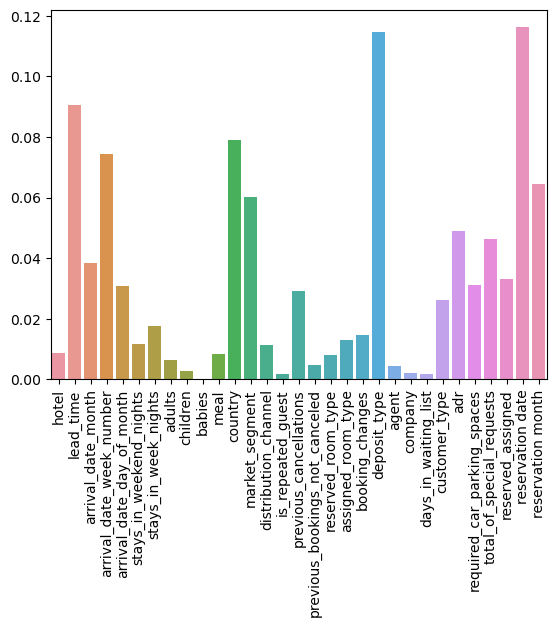

In [171]:
sns.barplot(y=tuned_rf.feature_importances_,x=X.columns)
plt.xticks(rotation=90)
plt.show()

#### XGBoost Tuning

In [172]:
from xgboost import XGBClassifier

In [191]:
xgb = XGBClassifier(random_state=20)

In [192]:
np.mean(cross_val_score(estimator=xgb,X=X,y=y,scoring='accuracy',cv=kf))

0.9754290991792539

In [195]:
xgb.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=20, ...)

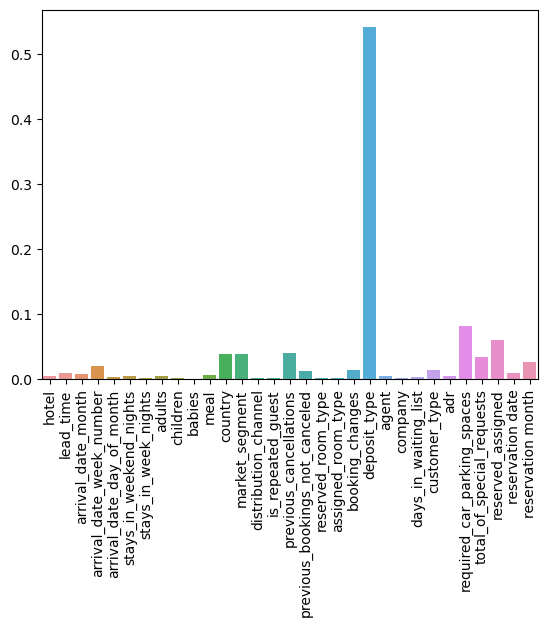

In [196]:
sns.barplot(y=xgb.feature_importances_,x=X.columns)
plt.xticks(rotation=90)
plt.show()

# ROC_AUC score for the models

In [286]:
from sklearn.model_selection import train_test_split as tts



In [287]:
X_train, X_test, Y_train, Y_test = tts(X, y, test_size = 0.33, random_state = 42, stratify = y)

In [288]:
from sklearn.metrics import roc_auc_score,roc_curve

In [289]:
import sklearn.metrics as metrics

In [296]:
model_dict_roc={'logreg':LogisticRegression(),
            'Decision tree':DecisionTreeClassifier(),
            'Random Forest':RandomForestClassifier(random_state=42),
            'Ada Boost':AdaBoostClassifier(),
           'Boosted RF' :AdaBoostClassifier(base_estimator=RandomForestClassifier(random_state=42)),
           'XGBoost Classifier':XGBClassifier(random_state=20)}

In [311]:
model_roc_auc=[]
for i in model_dict_roc.values():
    i.fit(X_train,Y_train)
    y_pred_proba = i.predict_proba(X_test)
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_proba[:,1])
    roc_auc = metrics.auc(fpr, tpr)
    model_roc_auc.append(roc_auc)

C:\Users\Lokavishruth\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [313]:
best_roc_auc = pd.DataFrame()
best_roc_auc['Model Name']=model_dict_roc.keys()
best_roc_auc['Roc Auc Score'] = model_roc_auc
best_roc_auc 

,Model Name,Roc Auc Score
0,logreg,0.820637
1,Decision tree,0.933400
2,Random Forest,0.986486
3,Ada Boost,0.917491
4,Boosted RF,0.986284
5,XGBoost Classifier,0.994098


# Best Threshold value for Random Forest

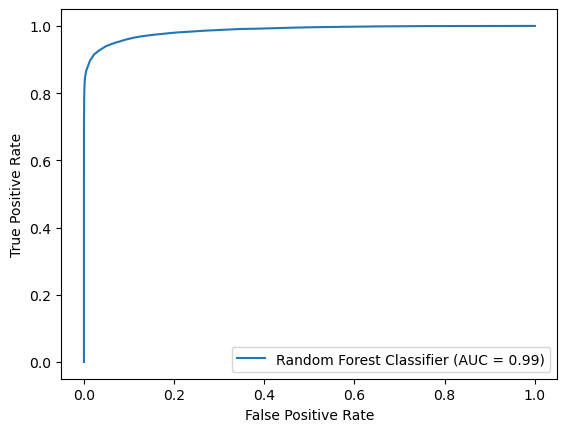

In [324]:
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train,Y_train)
y_pred_proba = rf.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_proba[:,1])
roc_auc = metrics.auc(fpr, tpr)
model_roc_auc.append(roc_auc)

metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='Random Forest Classifier').plot()

In [325]:
random_forest_threshold = pd.DataFrame()
random_forest_threshold['TPR']=tpr
random_forest_threshold['FPR']=fpr
random_forest_threshold['Threshold']=thresholds
random_forest_threshold['TPR-FPR']=random_forest_threshold['TPR']-random_forest_threshold['FPR']
random_forest_threshold.sort_values('TPR-FPR',ascending=False).head(5)

,TPR,FPR,Threshold,TPR-FPR
61,0.927330,0.033884,0.40,0.893446
60,0.924848,0.031434,0.41,0.893414
59,0.922780,0.029483,0.42,0.893297
57,0.918436,0.025247,0.44,0.893189
56,0.916092,0.023295,0.45,0.892797


In [326]:
y_pred = [1 if x>0.40 else 0 for x in y_pred_proba[:,1]]

<AxesSubplot:>

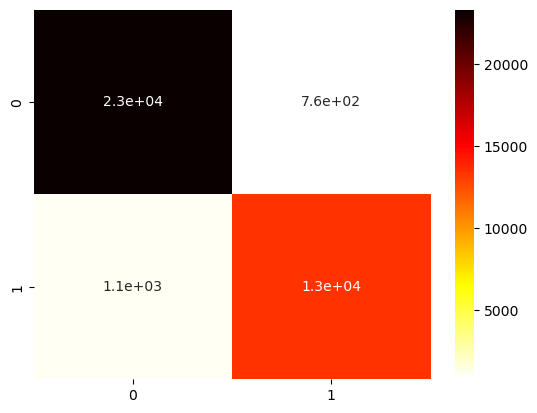

In [327]:
sns.heatmap(sklearn.metrics.confusion_matrix(Y_test,y_pred),annot=True,cmap='hot_r')

In [328]:
print(sklearn.metrics.classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96     24082
           1       0.95      0.92      0.94     14504

    accuracy                           0.95     38586
   macro avg       0.95      0.95      0.95     38586
weighted avg       0.95      0.95      0.95     38586



# Best Threshold Value for XGBoost Classifier

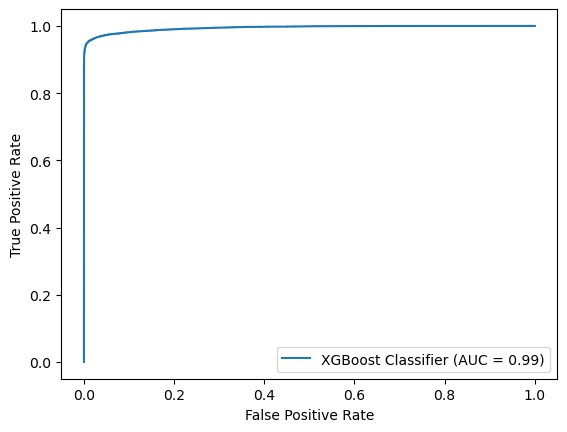

In [329]:
xgb=XGBClassifier(random_state=42)
xgb.fit(X_train,Y_train)
y_pred_proba = xgb.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_proba[:,1])
roc_auc = metrics.auc(fpr, tpr)
model_roc_auc.append(roc_auc)

metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='XGBoost Classifier').plot()

In [330]:
xg_threshold = pd.DataFrame()
xg_threshold['TPR']=tpr
xg_threshold['FPR']=fpr
xg_threshold['Threshold']=thresholds
xg_threshold['TPR-FPR']=xg_threshold['TPR']-xg_threshold['FPR']
xg_threshold.sort_values('TPR-FPR',ascending=False).head(5)

,TPR,FPR,Threshold,TPR-FPR
2201,0.954771,0.010506,0.331945,0.944265
2202,0.954771,0.010547,0.331411,0.944224
2207,0.954978,0.010838,0.329285,0.944140
2203,0.954771,0.010672,0.331287,0.944099
2208,0.954978,0.010879,0.329091,0.944098


In [331]:
y_pred = [1 if x>0.33 else 0 for x in y_pred_proba[:,1]]

<AxesSubplot:>

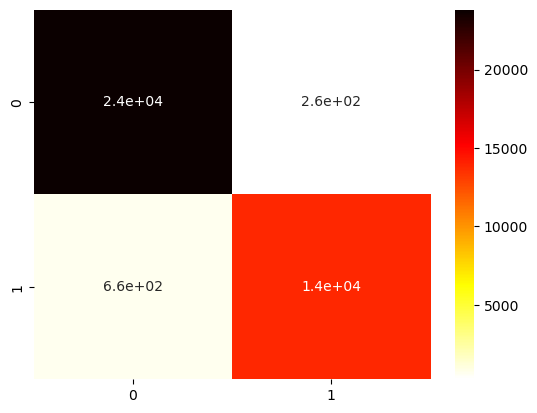

In [332]:
sns.heatmap(sklearn.metrics.confusion_matrix(Y_test,y_pred),annot=True,cmap='hot_r')

In [2]:
TP = 14000
# True Negatives:
TN = 24000
# False Posititives: 
FP = 260
# False Negatives: 
FN = 660
total = 14000+24000+260+660

print(f'Correctly classified: {np.round((TP+TN)/total*100)}%')
print(f'Canceled bookings correctly classified: {np.round(TP/(TP+FN)*100)}%')
print(f'Not canceled bookings correctly classified: {np.round(TN/(TN+FP)*100)}%')
print(f'Bookings predicted canceled that are actually canceled: {np.round(TP/(TP+FP)*100)}%')
print(f'Bookings predicted not canceled that are actually not canceled: {np.round(TN/(TN+FN)*100)}%')

Correctly classified: 98.0%
Canceled bookings correctly classified: 95.0%
Not canceled bookings correctly classified: 99.0%
Bookings predicted canceled that are actually canceled: 98.0%
Bookings predicted not canceled that are actually not canceled: 97.0%


In [333]:
print(sklearn.metrics.classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     24082
           1       0.98      0.95      0.97     14504

    accuracy                           0.98     38586
   macro avg       0.98      0.97      0.97     38586
weighted avg       0.98      0.98      0.98     38586

